In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set figure size to (12, 6)
plt.rcParams['figure.figsize'] = (12,6)

In [2]:
df = pd.read_csv('ECA_blended_custom/TG_STAID002759.txt', sep=",", skiprows=list(range(0,19)))
df

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0
...,...,...,...,...
52711,111448,20200426,124,0
52712,111448,20200427,151,0
52713,111448,20200428,170,0
52714,111448,20200429,120,0


In [3]:
df.rename(columns=lambda x: x.strip(), inplace=True)

In [4]:
df['TG'] = df['TG'] / 10

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'], format="%Y%m%d")

In [6]:
df.set_index('DATE', inplace=True)

In [7]:
# start dataframe from first day with values after WW2
df = df['1945-11-06':]

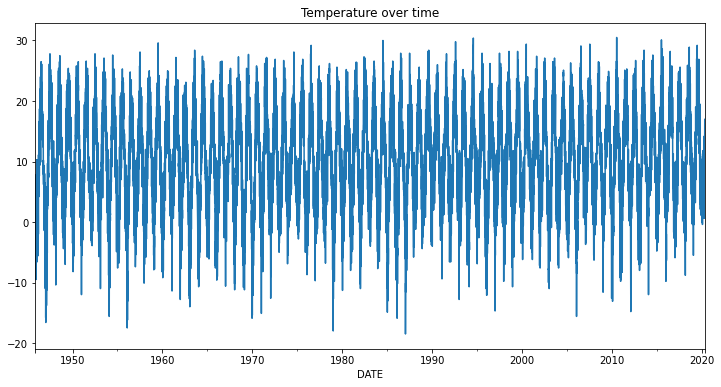

In [8]:
# to check for trends: test with linear regression and look for significance?
df.TG.plot(figsize=(12,6), title='Temperature over time')
plt.show()

In [9]:
df['difference'] = df['TG'].diff()
df.head()

<ipython-input-9-35911543a9fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['difference'] = df['TG'].diff()


,SOUID,TG,Q_TG,difference
DATE,,,,
1945-11-06,127488,7.8,0,NaN
1945-11-07,127488,6.8,0,-1.0
1945-11-08,127488,6.4,0,-0.4
1945-11-09,127488,4.0,0,-2.4
1945-11-10,127488,4.6,0,0.6


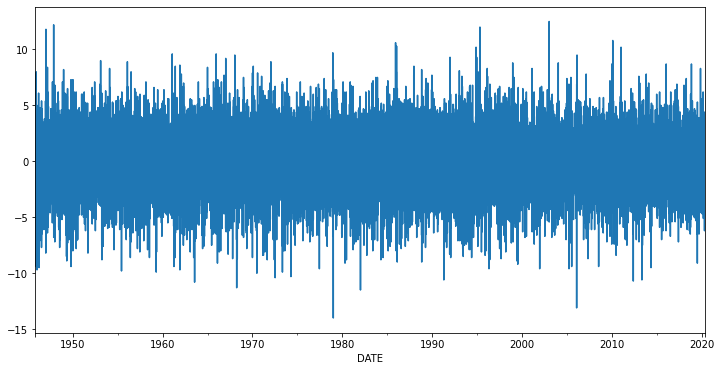

In [10]:
df['difference'].plot()

In [11]:
df['difference'].mean()

0.00021687987060726318

In [12]:
# How does second order differencing work?
df['2nddifference'] = df['difference'].diff()
df.head()

<ipython-input-12-fd311462d84a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2nddifference'] = df['difference'].diff()


,SOUID,TG,Q_TG,difference,2nddifference
DATE,,,,,
1945-11-06,127488,7.8,0,NaN,NaN
1945-11-07,127488,6.8,0,-1.0,NaN
1945-11-08,127488,6.4,0,-0.4,0.6
1945-11-09,127488,4.0,0,-2.4,-2.0
1945-11-10,127488,4.6,0,0.6,3.0


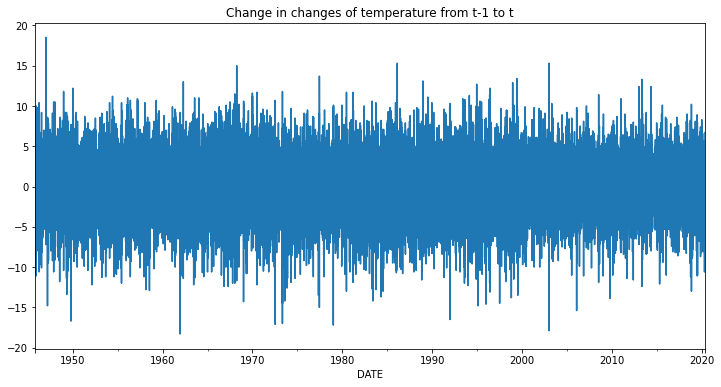

In [13]:
df['2nddifference'].plot(figsize=(12,6), title='Change in changes of temperature from t-1 to t')

In [14]:
df['2nddifference'].mean() # if close to 0 than trend probably linear

9.925375877660964e-05

In [15]:
df['day_of_year'] = df.index.dayofyear

<ipython-input-15-d1cb42a2beec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_year'] = df.index.dayofyear


In [16]:
df

,SOUID,TG,Q_TG,difference,2nddifference,day_of_year
DATE,,,,,,
1945-11-06,127488,7.8,0,NaN,NaN,310
1945-11-07,127488,6.8,0,-1.0,NaN,311
1945-11-08,127488,6.4,0,-0.4,0.6,312
1945-11-09,127488,4.0,0,-2.4,-2.0,313
1945-11-10,127488,4.6,0,0.6,3.0,314
...,...,...,...,...,...,...
2020-04-26,111448,12.4,0,1.5,5.1,117
2020-04-27,111448,15.1,0,2.7,1.2,118
2020-04-28,111448,17.0,0,1.9,-0.8,119


In [17]:
# calculate the monthly mean difference of the log transformed passenger numbers
df.groupby('day_of_year')['difference'].mean()

day_of_year
1     -0.008000
2      0.422667
3     -0.116000
4     -0.413333
5      0.048000
         ...   
362    0.020000
363   -0.696000
364   -0.509333
365   -0.408000
366    0.594444
Name: difference, Length: 366, dtype: float64

In [18]:
# Transform takes in a pd.Series and returns an array of the same length
df['daily_mean'] = df.groupby('day_of_year')['difference'].transform('mean')
df.head()

<ipython-input-18-ddc8d1f63ccf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily_mean'] = df.groupby('day_of_year')['difference'].transform('mean')


,SOUID,TG,Q_TG,difference,2nddifference,day_of_year,daily_mean
DATE,,,,,,,
1945-11-06,127488,7.8,0,NaN,NaN,310,-0.266216
1945-11-07,127488,6.8,0,-1.0,NaN,311,-0.256000
1945-11-08,127488,6.4,0,-0.4,0.6,312,-0.165333
1945-11-09,127488,4.0,0,-2.4,-2.0,313,-0.308000
1945-11-10,127488,4.6,0,0.6,3.0,314,-0.376000


In [19]:
# demean the series
df['deseasonalized'] = df['difference'] - df['daily_mean']

<ipython-input-19-b83160bd26d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deseasonalized'] = df['difference'] - df['daily_mean']


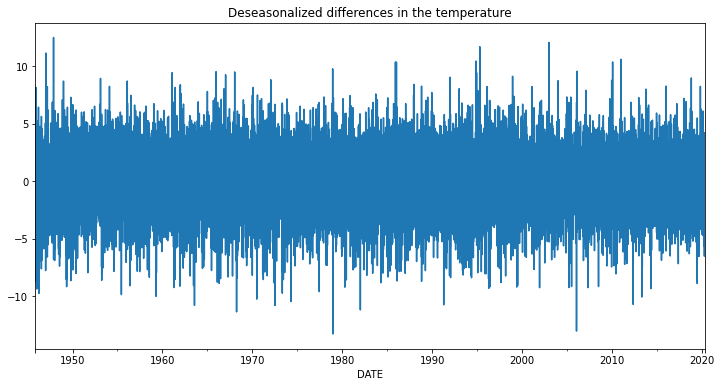

In [20]:
df['deseasonalized'].plot(figsize=(12,6), title='Deseasonalized differences in the temperature')

### Naive forecasting

In [36]:
df.reset_index().index.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


Train-test-split

In [37]:
xtrain = df.reset_index().index.tolist()[:-365]
xtest = df.reset_index().index.tolist()[-365:]
ytrain = df['deseasonalized'].tolist()[:-365]
ytrain[0] = 0
ytest = df['deseasonalized'].tolist()[-365:]

### 1. Forecast the last value seen

In [42]:
ypred_last = ytrain[-1:] * len(xtest)
ypred_last

[1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666666663,
 1.4026666666

### 2. Forecast the mean

In [43]:
mean = sum(ytrain) / len(ytrain)
ypred_mean = [mean] * len(xtest) 
ypred_mean

[-0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470361568722932,
 -0.00012470

### 3. Seasonal mean

In [49]:
ypred_sm = []
for i, j in enumerate(xtest):
    day = i % 365
    daily_mean = sum(ytrain[day::365]) / len(ytrain[day::365])
    ypred_sm.append(daily_mean)

In [55]:
ypred_sm

[-0.08617604090577062,
 0.10423228634039444,
 0.11769807645483321,
 0.19636279522766018,
 -0.2114355977599221,
 0.18130168005843683,
 0.19194594594594597,
 -0.3768142196250305,
 0.16769710250791334,
 0.08837983929875821,
 -0.705508643778914,
 0.29175066958850754,
 0.0948132456781106,
 -0.08243194545897246,
 -0.06062624786949114,
 0.18863744825906997,
 0.508373995617239,
 -0.3341295349403457,
 -0.31994010226442654,
 -0.23372972972972977,
 0.27059459459459484,
 0.13754954954954957,
 0.013837837837837619,
 0.16118918918918915,
 0.2791351351351352,
 0.058684684684684664,
 -0.10063063063063069,
 -0.4030450450450448,
 -0.1794234234234234,
 0.3404864864864865,
 0.1205765765765766,
 -0.18437837837837845,
 -0.0010810810810811151,
 -0.1307027027027027,
 -0.5089909909909908,
 -0.01279279279279277,
 0.0895495495495495,
 0.08475675675675673,
 -0.24138738738738733,
 0.41394594594594614,
 -0.025657657657657543,
 -0.05407207207207194,
 -0.29978378378378373,
 0.11007207207207212,
 0.048864864864864924,

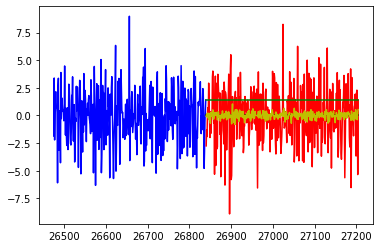

In [51]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(xtrain[-365:], ytrain[-365:], 'b-')
plt.plot(xtest, ytest, 'r-')
plt.plot(xtest, ypred_last, 'g-')
plt.plot(xtest, ypred_mean, 'k-')
plt.plot(xtest, ypred_sm, 'y-')